In [29]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [31]:
# Dataset url: https://www.kaggle.com/sobhanmoosavi/us-accidents?select=US_Accidents_Dec20.csv
df = pd.read_csv('US_Accidents_Dec20_updated.csv')

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [32]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.388122e+06,1.388121e+06,1.388121e+06,1.388121e+06,1.388121e+06,1.388121e+06,440986.000000,1.348129e+06,987904.000000,1.345739e+06,1.354651e+06,1.347484e+06,1.272230e+06,929039.000000
mean,2.215807e+00,3.680406e+01,-9.866799e+01,3.680412e+01,-9.866780e+01,5.784379e-01,8741.022903,5.872843e+01,54.133993,6.492706e+01,2.957471e+01,9.093215e+00,7.591646e+00,0.008352
std,5.895244e-01,5.151583e+00,1.850550e+01,5.151575e+00,1.850537e+01,1.640741e+00,16812.510292,1.826930e+01,21.032090,2.329659e+01,9.701757e-01,2.887534e+00,5.690448e+00,0.127960
min,1.000000e+00,2.457022e+01,-1.244975e+02,2.457011e+01,-1.244978e+02,0.000000e+00,1.000000,-8.900000e+01,-89.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+00,3.384350e+01,-1.182147e+02,3.384376e+01,-1.182144e+02,0.000000e+00,1206.000000,4.640000e+01,40.000000,4.800000e+01,2.945000e+01,1.000000e+01,3.500000e+00,0.000000
50%,2.000000e+00,3.718999e+01,-9.439585e+01,3.718999e+01,-9.439556e+01,1.570000e-01,3998.000000,6.000000e+01,57.000000,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000
75%,2.000000e+00,4.068198e+01,-8.086588e+01,4.068212e+01,-8.086605e+01,5.830000e-01,10000.000000,7.200000e+01,70.000000,8.400000e+01,3.005000e+01,1.000000e+01,1.040000e+01,0.000000
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,961043.000000,1.706000e+02,113.000000,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,24.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388122 entries, 0 to 1388121
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1388122 non-null  object 
 1   Severity               1388122 non-null  int64  
 2   Start_Time             1388122 non-null  object 
 3   End_Time               1388122 non-null  object 
 4   Start_Lat              1388121 non-null  float64
 5   Start_Lng              1388121 non-null  float64
 6   End_Lat                1388121 non-null  float64
 7   End_Lng                1388121 non-null  float64
 8   Distance(mi)           1388121 non-null  float64
 9   Description            1388121 non-null  object 
 10  Number                 440986 non-null   float64
 11  Street                 1388121 non-null  object 
 12  Side                   1388121 non-null  object 
 13  City                   1388042 non-null  object 
 14  County            

In [34]:
#Finding missing values and displaying in ascending order
df.isna().sum().sort_values(ascending=True)

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Crossing                      1
Give_Way                      1
Junction                      1
No_Exit                       1
Railway                       1
Roundabout                    1
Station                       1
Stop                          1
Traffic_Calming               1
Traffic_Signal                1
Country                       1
Turning_Loop                  1
County                        1
Bump                          1
Side                          1
Street                        1
Description                   1
Distance(mi)                  1
End_Lng                       1
End_Lat                       1
Start_Lng                     1
Start_Lat                     1
State                         1
Amenity                       1
Sunrise_Sunset               80
Civil_Twilight               80
Astronomical_Twilight        80
Nautical

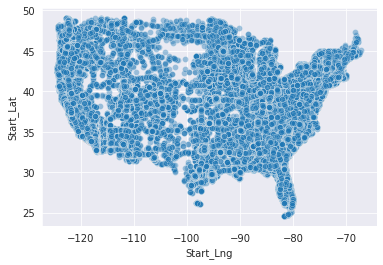

In [35]:
#Let's start with geographical data
sns.set_style("darkgrid")
sns.scatterplot(x="Start_Lng", y="Start_Lat", data=df, alpha=0.4)

In [36]:
df['Severity'].count()

1388122

In [37]:
accidents_severity = df.groupby('Severity').count()['ID']
accidents_severity

Severity
1      28178
2    1127775
3     136593
4      95576
Name: ID, dtype: int64

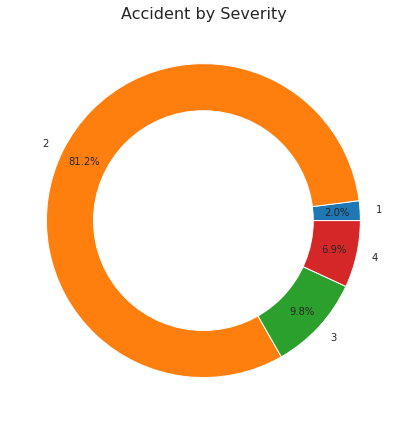

In [39]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

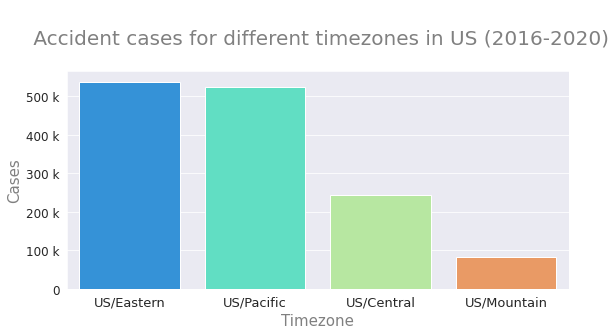

In [40]:
#Which timezone reported the most number of accident cases
timezone = pd.DataFrame(df.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases for different timezones in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\n Timezone \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=timezone.Timezone , y=timezone.Cases,palette="rainbow")
import matplotlib.ticker as ticker
a.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [41]:
cities = df['City'].unique()
len(cities)

10413

In [42]:
# All cities by number of accidents

accidents_by_cities = df['City'].value_counts()
accidents_by_cities

Los Angeles      37491
Miami            34294
Charlotte        20682
Houston          18592
Dallas           17619
                 ...  
Worland              1
Mills                1
Highland Home        1
Pompton Lakes        1
Glen Aubrey          1
Name: City, Length: 10412, dtype: int64

In [43]:
#Top 10 cities by number of accidents

accidents_by_cities[:10]

Los Angeles    37491
Miami          34294
Charlotte      20682
Houston        18592
Dallas         17619
Sacramento     17589
Orlando        15038
San Diego      13239
Portland       12563
Minneapolis    11933
Name: City, dtype: int64

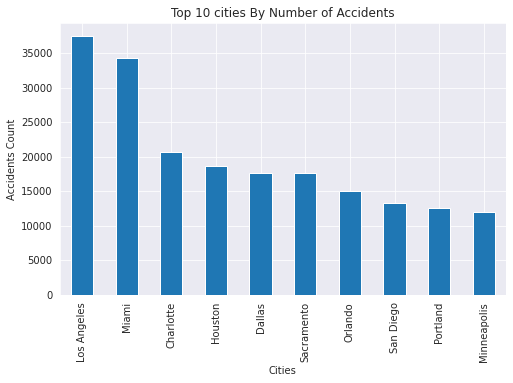

In [44]:
#Bar Chart to Visualize Top 10 cities by number of accidents

fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [45]:
import datetime as dt

df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Start_Time"].dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
1388117    2017
1388118    2017
1388119    2017
1388120    2017
1388121    2017
Name: Start_Time, Length: 1388122, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


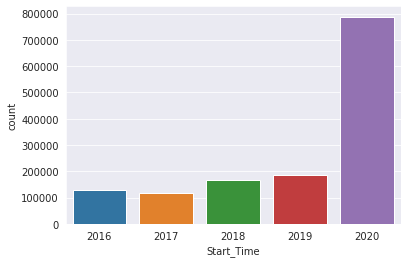

In [46]:
sns.countplot(df["Start_Time"].dt.year)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


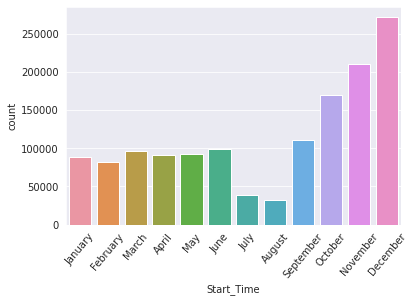

In [47]:
g = sns.countplot(df["Start_Time"].dt.month)
var = g.set_xticklabels(rotation=50, labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


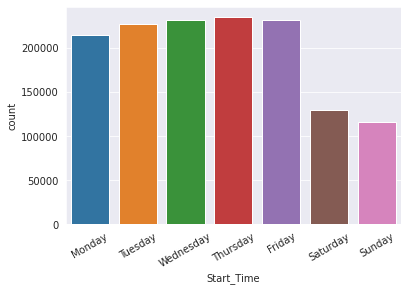

In [48]:
g = sns.countplot(df["Start_Time"].dt.dayofweek)
var = g.set_xticklabels(rotation=30, labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])